The 1 th iteration, the convergence is: tol= 1.0
The 2 th iteration, the convergence is: tol= 0.13551368640522243
The 3 th iteration, the convergence is: tol= 0.01095996746555139
The 4 th iteration, the convergence is: tol= 0.0009998878797592425
The 5 th iteration, the convergence is: tol= 0.0004464050335382108
The 6 th iteration, the convergence is: tol= 0.0004464050335382108
The 7 th iteration, the convergence is: tol= 0.00044206842950522685
The 8 th iteration, the convergence is: tol= 0.00043444372465961667
The 9 th iteration, the convergence is: tol= 0.00043444372465961667
The 10 th iteration, the convergence is: tol= 0.00043444372465961667
The 11 th iteration, the convergence is: tol= 0.00043444372465961667
The 12 th iteration, the convergence is: tol= 0.00043444372465961667
The 13 th iteration, the convergence is: tol= 0.00043444372465961667
The 14 th iteration, the convergence is: tol= 0.00043444372465961667
The 15 th iteration, the convergence is: tol= 0.00043444372465961667
Th

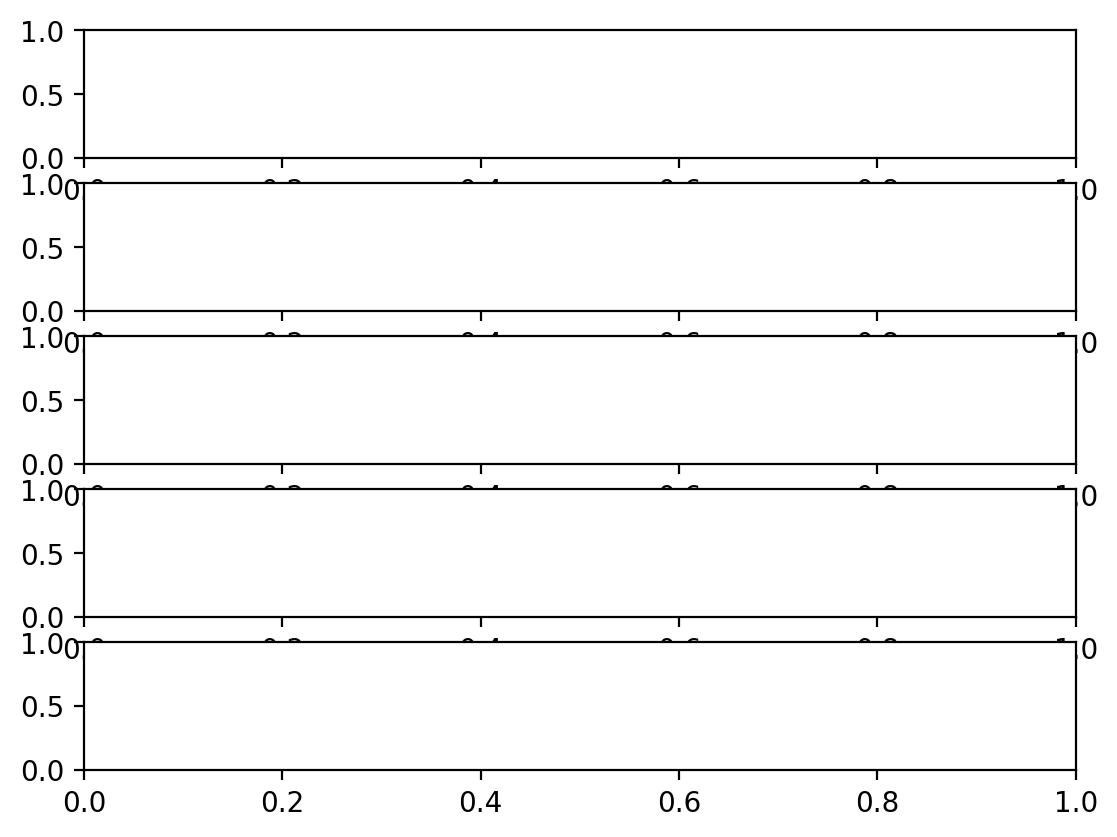

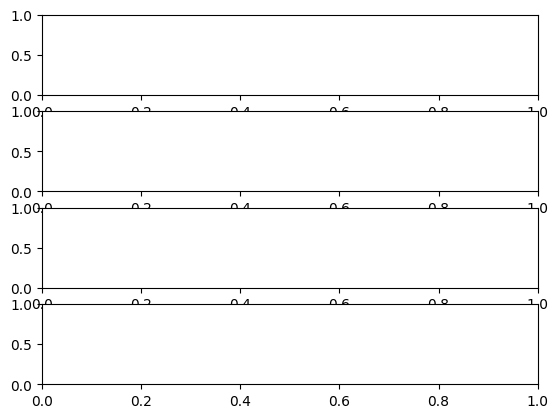

In [1]:
from games.SIR import SIR_Game
from games.ring import ring_Game
import numpy as np 
import torch 
from games.controller import ring_control
import matplotlib.pyplot as plt 
W = np.array([
    [0.8,0.4],
    [0.4, 0.8]
])
K = len(W)

game = SIR_Game(W,K=2)
control = ring_control(np.arange(11))
game = ring_Game(W,K=2,Controller=control)
lr = 4.0
tol = 1.0 
threshold = 4*1e-4
MAX_ITER = 100

for i in range(MAX_ITER):
    '''
    obtain the stable mean field under the current policy, 
    and do the policy improvement
    '''
    
    game.mean_field = game.random_mf()
    game.pop_inf(iter=1000)
    pi_prev = game.pi.copy()
    temp = np.zeros((game.K,game.nstate,game.naction))
    for k in range(game.K):
        Q = game.Gamma_q_func(k)
        for s in range(game.nstate):
            q = Q[s]
            temp[k,s] = game.mirror(k,s,q,eta=lr)
    
    game.pi = temp.copy()
    tol_1 = np.sum(np.abs(game.pi-pi_prev))
    tol = min(tol,tol_1)
    print("The {} th iteration, the convergence is: tol= {}".format(i+1, tol)) 
    if tol<threshold:
        print("Converge to the equilibrium with tol ={} ".format(tol))
        break 
fig,axs = plt.subplots(5,1,dpi=200)


mf = np.mean(game.mean_field,axis=0)
pi = game.pi[0]
print(mf)
print(pi)

(0.0, 1.0)

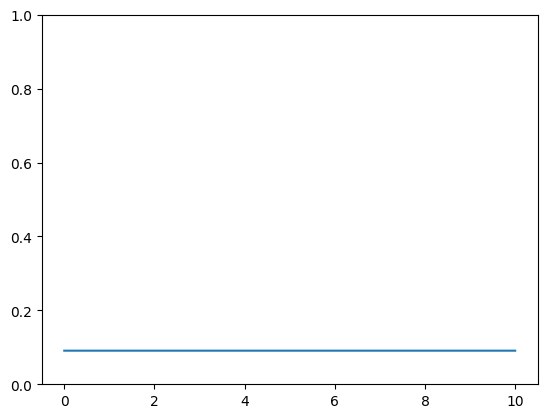

In [6]:
plt.plot(mf)
plt.ylim(0,1)

(0.0, 1.0)

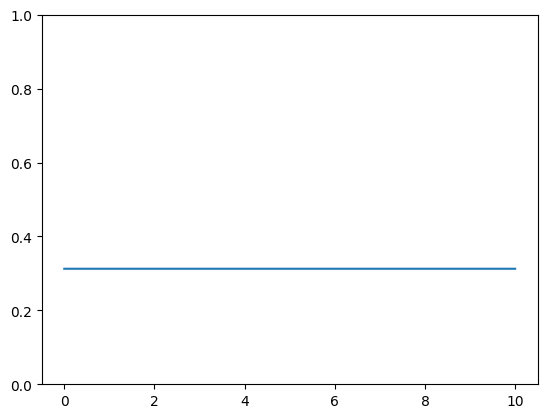

In [5]:
plt.plot(pi[:,0])
plt.ylim(0,1)

In [4]:
# axs[0].plot(mf,label = "Mean Field ",color = 'blue')
# axs[0].set_title("Mean Field")
# axs[1].plot(pi[:,0])
# axs[1].set_title("Turn Left")
# axs[2].plot(pi[:,1])
# axs[2].set_title("Stay Still")
# axs[3].plot(pi[:,2])
# axs[3].set_title("Turn Right")

# fig.tight_layout()
# plt.savefig("./result/ring_control_{}.png".format(game.nstate))
# plt.show()

(15,)

15

In [50]:
# game = SIR_Game(W,K=2)
control = ring_control(np.arange(11))
game = ring_Game(W,K=2,Controller=control)
lr = 4.0
tol = 1.0 
threshold = 1e-4*2
MAX_ITER = 100

for i in range(MAX_ITER):
    '''
    obtain the stable mean field under the current policy, 
    and do the policy improvement
    '''
    
    game.mean_field = game.random_mf()
    game.pop_inf(iter=1000)
    pi_prev = game.pi.copy()
    temp = np.zeros((game.K,game.nstate,game.naction))
    for k in range(game.K):
        Q = game.Gamma_q_func(k)
        for s in range(game.nstate):
            q = Q[s]
            temp[k,s] = game.mirror(k,s,q,eta=lr)
    
    game.pi = temp.copy()

    # print(game.pi)
    # print(pi_prev)
    tol_1 = np.sum(np.abs(game.pi-pi_prev))
    tol = min(tol,tol_1)
    
    print("The {} th iteration, the convergence is: tol= {}".format(i+1, tol_1)) 
    if tol<threshold:
        print("Converge to the equilibrium with tol ={} ".format(tol))
        break 




The 1 th iteration, the convergence is: tol= 24.915080098447852
The 2 th iteration, the convergence is: tol= 32.4457903079795
The 3 th iteration, the convergence is: tol= 29.16755608434041
The 4 th iteration, the convergence is: tol= 31.049979046731497
The 5 th iteration, the convergence is: tol= 32.90696328608104
The 6 th iteration, the convergence is: tol= 31.480962776145812
The 7 th iteration, the convergence is: tol= 34.524024435587
The 8 th iteration, the convergence is: tol= 35.122878867254435
The 9 th iteration, the convergence is: tol= 26.63207250319261
The 10 th iteration, the convergence is: tol= 34.1992293891099
The 11 th iteration, the convergence is: tol= 27.82882103638607
The 12 th iteration, the convergence is: tol= 32.02071357199408
The 13 th iteration, the convergence is: tol= 28.220796883859425
The 14 th iteration, the convergence is: tol= 21.084327043655044
The 15 th iteration, the convergence is: tol= 33.39223134797556
The 16 th iteration, the convergence is: tol= 2

KeyboardInterrupt: 

In [55]:
game.pop_inf()
game.mean_field.shape

(2, 11)

29.97060129903141